# Building a Text Analysis Pipeline for Ancient Languages with CLTK

This workshop will introduce the Classical Language Toolkit, an open-source Python framework dedicated to text analysis and natural language processing for historical languages. Participants will be taken through the basic stages of a text analysis pipeline, namely corpus loading, preprocessing, sentence and word tokenization, lemmatization, part-of-speech and morphological tagging, prosody identification, and more. Examples will given primarily using Latin texts (and English translations), though some attention will be given to other languages supported by the project, including Ancient Greek and Akkadian. Participants are encouraged to bring their laptops; the demonstration can be followed along with interactively in a web browser without any installation or setup.

## Setup

In [1]:
from pprint import pprint #RUN CELLS BY PRESSING SHIFT & RETURN TOGETHER

## Working with CLTK Corpora

### Installing Corpora

In [2]:
## Set up corpora

## You will need the models/datasets that the new lemmatizer uses
## Note that this will generate an error if this and older 
## version of this corpus is already installed. If that happens,
## backup the old version, move or delete it, and reimport the corpus.

#from cltk.corpus.utils.importer import CorpusImporter

#corpus_importer = CorpusImporter('latin')
#corpus_importer.list_corpora

#corpus_importer.import_corpus('latin_models_cltk')

## We will be using the Latin Library corpus for today's workshop,
## so we will also need to import that as well.

#corpus_importer.import_corpus('latin_text_latin_library')

### Loading a CLTK corpus

In [3]:
# Get the Latin Library corpus

from cltk.corpus.readers import get_corpus_reader
ll = get_corpus_reader(language='latin', 
                       corpus_name='latin_text_latin_library')

# The CLTK Latin Library corpus is a web-scraped collection of plaintext files
# from thelatinlibrary.com.

# We can access the individual files as follows...

files = ll.fileids()
print(files[:50]) # The first 50 files in the corpus

# Note the [:50] slice to limit our list to the first 50 items.

['12tables.txt', '1644.txt', 'abbofloracensis.txt', 'abelard/dialogus.txt', 'abelard/epistola.txt', 'abelard/historia.txt', 'addison/barometri.txt', 'addison/burnett.txt', 'addison/hannes.txt', 'addison/machinae.txt', 'addison/pax.txt', 'addison/praelium.txt', 'addison/preface.txt', 'addison/resurr.txt', 'addison/sphaer.txt', 'adso.txt', 'aelredus.txt', 'agnes.txt', 'alanus/alanus1.txt', 'alanus/alanus2.txt', 'albertanus/albertanus.arsloquendi.txt', 'albertanus/albertanus.liberconsol.txt', 'albertanus/albertanus.sermo.txt', 'albertanus/albertanus.sermo1.txt', 'albertanus/albertanus.sermo2.txt', 'albertanus/albertanus.sermo3.txt', 'albertanus/albertanus.sermo4.txt', 'albertanus/albertanus1.txt', 'albertanus/albertanus2.txt', 'albertanus/albertanus3.txt', 'albertanus/albertanus4.txt', 'albertofaix/hist1.txt', 'albertofaix/hist10.txt', 'albertofaix/hist11.txt', 'albertofaix/hist12.txt', 'albertofaix/hist2.txt', 'albertofaix/hist3.txt', 'albertofaix/hist4.txt', 'albertofaix/hist5.txt', 'al

In [6]:
# Stats

file_count = len(files)
print(f'There are {file_count} files in this corpus.')

There are 2141 files in this corpus.


In [9]:
virgil_files = [file for file in files if "vergil" in file]
print(virgil_files)

['vergil/aen1.txt', 'vergil/aen10.txt', 'vergil/aen11.txt', 'vergil/aen12.txt', 'vergil/aen2.txt', 'vergil/aen3.txt', 'vergil/aen4.txt', 'vergil/aen5.txt', 'vergil/aen6.txt', 'vergil/aen7.txt', 'vergil/aen8.txt', 'vergil/aen9.txt', 'vergil/ec1.txt', 'vergil/ec10.txt', 'vergil/ec2.txt', 'vergil/ec3.txt', 'vergil/ec4.txt', 'vergil/ec5.txt', 'vergil/ec6.txt', 'vergil/ec7.txt', 'vergil/ec8.txt', 'vergil/ec9.txt', 'vergil/geo1.txt', 'vergil/geo2.txt', 'vergil/geo3.txt', 'vergil/geo4.txt']


In [10]:
print(ll.raw(virgil_files[0])[101:616])

Arma virumque cano, Troiae qui primus ab oris 
Italiam, fato profugus, Laviniaque venit 
litora, multum ille et terris iactatus et alto 
vi superum saevae memorem Iunonis ob iram; 
multa quoque et bello passus, dum conderet urbem,    5 
inferretque deos Latio, genus unde Latinum, 
Albanique patres, atque altae moenia Romae.
 

 
Musa, mihi causas memora, quo numine laeso, 
quidve dolens, regina deum tot volvere casus 
insignem pietate virum, tot adire labores    10 
impulerit. Tantaene animis caelestibus irae?


In [11]:
print(ll.raw(virgil_files[0])[:200])

Vergil: Aeneid I
		 

		 
		
		 
		
		 
		 
	 
	
 


 P. VERGILI MARONIS AENEIDOS LIBER PRIMVS 


 

Arma virumque cano, Troiae qui primus ab oris 
Italiam, fato profugus, Laviniaque venit 
litora, mu


In [12]:
print(ll.raw(virgil_files[0])[-200:])

dias,' inquit, 'Danaum, casusque tuorum, 
erroresque tuos; nam te iam septima portat    755 
omnibus errantem terris et fluctibus aestas.'
 

 
	 
		 Vergil 
		 The Latin Library 
		 The Classics Page


In [13]:
word_count = len(list(ll.words(virgil_files[0])))
print(word_count)

6370


In [14]:
sent_count = len(list(ll.sents(virgil_files[0])))
print(sent_count)

299


## Preprocessing

In [15]:
# Imports for preprocessing

import re # Regex module, useful for pattern matching
import html # Useful for handling entities

# Import/load a CLTK tool for normalizing i/j and u/v in Latin texts
from cltk.stem.latin.j_v import JVReplacer
replacer = JVReplacer()

In [16]:
def preprocess(text):

    # Remove Latin Library-specific paratexts with regex
    
    remove_list = [
            r'\bP. VERGILI MARONIS AENEIDOS LIBER .+\b',
            r'Vergil: Aeneid .+',
            r'\bThe Latin Library\b',
            r'\bThe Classics Page\b',
            r'\bVergil\b',
        ]
    
    for pattern in remove_list:
        text = re.sub(pattern, '', text)

    # Remove html entities and related html artifacts
    
    text = html.unescape(text) # Handle html entities
    text = re.sub(r'&nbsp;?', ' ',text) #&nbsp; stripped incorrectly in corpus?
    text = re.sub(r'\x00',' ',text) #Another space problem?
    text = re.sub(r' \xa0 ', '    ', text)
    
    # Lowercase text
    text = text.lower()

    # Normalize text
    text = replacer.replace(text) #Normalize u/v & i/j
    
    # Remove punctuation with translate
    punctuation ="\"#$%&\'()+,-/:;<=>@[\]^_`{|}~.?!«»—"
    translator = str.maketrans({key: " " for key in punctuation})
    text = text.translate(translator)
    
    # Remove numbers
    translator = str.maketrans({key: " " for key in '0123456789'})
    text = text.translate(translator)
    
    # Handle spacing
    text = re.sub('[ ]+',' ', text) # Remove double spaces
    text = re.sub('\t',' ', text) # Remove tabs
    text = re.sub('^\s+','', text)
    text = re.sub(' \n', '\n', text)
    text = re.sub('\n\n', '~', text)
    text = re.sub('~+', '\n\n', text)
    
    return text.strip()

In [17]:
virgil_raw = ll.raw(virgil_files[0])
print(virgil_raw[:500])

Vergil: Aeneid I
		 

		 
		
		 
		
		 
		 
	 
	
 


 P. VERGILI MARONIS AENEIDOS LIBER PRIMVS 


 

Arma virumque cano, Troiae qui primus ab oris 
Italiam, fato profugus, Laviniaque venit 
litora, multum ille et terris iactatus et alto 
vi superum saevae memorem Iunonis ob iram; 
multa quoque et bello passus, dum conderet urbem,    5 
inferretque deos Latio, genus unde Latinum, 
Albanique patres, atque altae moenia Romae.
 

 
Musa, mihi causas memora, quo numine laeso, 
quidve dolens, regina d


In [18]:
virgil_pp = preprocess(ll.raw(virgil_files[0]))
print(virgil_pp[:500])

arma uirumque cano troiae qui primus ab oris
italiam fato profugus lauiniaque uenit
litora multum ille et terris iactatus et alto
ui superum saeuae memorem iunonis ob iram
multa quoque et bello passus dum conderet urbem
inferretque deos latio genus unde latinum
albanique patres atque altae moenia romae

musa mihi causas memora quo numine laeso
quidue dolens regina deum tot uoluere casus
insignem pietate uirum tot adire labores
impulerit tantaene animis caelestibus irae

urbs antiqua fuit tyrii t


## Tokenization

In [19]:
# Set up CLTK Latin word tokenizer

from cltk.tokenize.word import WordTokenizer
word_tokenizer = WordTokenizer('latin')

In [20]:
# Here is what the same poem looks like as a list of tokens

tokens = word_tokenizer.tokenize(virgil_pp)

print(tokens[:125])
print('\n')
print(f'There are {len(tokens)} tokens in Virgil 1.')

['arma', 'uirum', '-que', 'cano', 'troiae', 'qui', 'primus', 'ab', 'oris', 'italiam', 'fato', 'profugus', 'lauinia', '-que', 'uenit', 'litora', 'multum', 'ille', 'et', 'terris', 'iactatus', 'et', 'alto', 'ui', 'superum', 'saeuae', 'memorem', 'iunonis', 'ob', 'iram', 'multa', 'quoque', 'et', 'bello', 'passus', 'dum', 'conderet', 'urbem', 'inferret', '-que', 'deos', 'latio', 'genus', 'unde', 'latinum', 'albani', '-que', 'patres', 'atque', 'altae', 'moenia', 'romae', 'musa', 'mihi', 'causas', 'memora', 'quo', 'numine', 'laeso', 'quid', '-ue', 'dolens', 'regina', 'deum', 'tot', 'uoluere', 'casus', 'insignem', 'pietate', 'uirum', 'tot', 'adire', 'labores', 'impulerit', 'tantaene', 'animis', 'caelestibus', 'irae', 'urbs', 'antiqua', 'fuit', 'tyrii', 'tenuere', 'coloni', 'karthago', 'italiam', 'contra', 'tiberina', '-que', 'longe', 'ostia', 'diues', 'opum', 'studiis', '-que', 'asperrima', 'belli', 'quam', 'iuno', 'fertur', 'terris', 'magis', 'omnibus', 'unam', 'posthabita', 'coluisse', 'samo'

## Lemmatization

In [21]:
# # We need to import a data model to train the lemmatizer.

# import os
# from cltk.utils.file_operations import open_pickle

# # Set up training sentences

# rel_path = os.path.join('~/cltk_data/latin/model/latin_models_cltk/lemmata/backoff')
# path = os.path.expanduser(rel_path)

# # Check for presence of latin_pos_lemmatized_sents
# file = 'latin_pos_lemmatized_sents.pickle'      

# latin_pos_lemmatized_sents_path = os.path.join(path, file)
# if os.path.isfile(latin_pos_lemmatized_sents_path):
#     latin_pos_lemmatized_sents = open_pickle(latin_pos_lemmatized_sents_path)
# else:
#     latin_pos_lemmatized_sents = []
#     print('The file %s is not available in cltk_data' % file)

In [22]:
# # Set up CLTK Latin backoff lemmatizer

# from cltk.lemmatize.latin.backoff import BackoffLatinLemmatizer
# lemmatizer = BackoffLatinLemmatizer(latin_pos_lemmatized_sents)

In [23]:
import pickle
lemmatizer = pickle.load(open('./tools/lemmatizer.p','rb'))

In [24]:
lemmas = lemmatizer.lemmatize(tokens)

In [25]:
print(lemmas[:100])

[('arma', 'arma'), ('uirum', 'uir'), ('-que', '-que'), ('cano', 'cano'), ('troiae', 'troia'), ('qui', 'qui'), ('primus', 'primus'), ('ab', 'ab'), ('oris', 'ora'), ('italiam', 'italia'), ('fato', 'fatum'), ('profugus', 'profugus'), ('lauinia', 'lauinia'), ('-que', '-que'), ('uenit', 'uenio'), ('litora', 'litus'), ('multum', 'multus'), ('ille', 'ille'), ('et', 'et'), ('terris', 'terra'), ('iactatus', 'jacto'), ('et', 'et'), ('alto', 'altus'), ('ui', 'uis'), ('superum', 'superi'), ('saeuae', 'saevus'), ('memorem', 'memoro'), ('iunonis', 'iuno'), ('ob', 'ob'), ('iram', 'ira'), ('multa', 'multus'), ('quoque', 'quoque'), ('et', 'et'), ('bello', 'bellum'), ('passus', 'patior'), ('dum', 'dum'), ('conderet', 'condo'), ('urbem', 'urbs'), ('inferret', 'infero'), ('-que', '-que'), ('deos', 'deus'), ('latio', 'latium'), ('genus', 'genus'), ('unde', 'unde'), ('latinum', 'latinum'), ('albani', 'albani'), ('-que', '-que'), ('patres', 'pater'), ('atque', 'atque'), ('altae', 'alo'), ('moenia', 'moenia')

In [26]:
from pprint import pprint

pprint(lemmas[:25])

[('arma', 'arma'),
 ('uirum', 'uir'),
 ('-que', '-que'),
 ('cano', 'cano'),
 ('troiae', 'troia'),
 ('qui', 'qui'),
 ('primus', 'primus'),
 ('ab', 'ab'),
 ('oris', 'ora'),
 ('italiam', 'italia'),
 ('fato', 'fatum'),
 ('profugus', 'profugus'),
 ('lauinia', 'lauinia'),
 ('-que', '-que'),
 ('uenit', 'uenio'),
 ('litora', 'litus'),
 ('multum', 'multus'),
 ('ille', 'ille'),
 ('et', 'et'),
 ('terris', 'terra'),
 ('iactatus', 'jacto'),
 ('et', 'et'),
 ('alto', 'altus'),
 ('ui', 'uis'),
 ('superum', 'superi')]


## POS & Morphological Tagging

In [27]:
from cltk.tag.pos import POSTag

tagger = POSTag('latin')

In [28]:
pos_tags = tagger.tag_ngram_123_backoff(' '.join(tokens))
pprint(pos_tags[:10])

[('arma', 'N-P---NA-'),
 ('uirum', None),
 ('-', 'U--------'),
 ('que', 'C--------'),
 ('cano', None),
 ('troiae', 'N-S---FG-'),
 ('qui', 'P-P---MN-'),
 ('primus', 'A-S---MN-'),
 ('ab', 'R--------'),
 ('oris', 'N-P---NB-')]


In [ ]:
# pos_tags_2 = tagger.tag_tnt(' '.join(tokens))
# pprint(pos_tags_2[:10])

## Prosody Tagging

In [29]:
# import Levenshtein

from cltk.prosody.latin.hexameter_scanner import HexameterScanner
scanner = HexameterScanner()

In [30]:
scansion = scanner.scan(virgil_pp[:44])
print(scansion.syllables)
print(scansion.scansion)

['ārm', 'u', 'i', 'rūm', 'que', 'ca', 'nō', 'tro', 'jae', 'quī', 'pri', 'mus', 'ab', 'o', 'ris']
-    UU -   U  U -   -  -   -   - U  U  - U 


In [31]:
from cltk.tokenize.line import LineTokenizer
line_tokenizer = LineTokenizer('latin')

In [32]:
lines = line_tokenizer.tokenize(virgil_pp)

In [33]:
for line in lines[:10]:
    scansion = scanner.scan(line)
    print(scansion.scansion.replace(' ',''))

-UU-UU-----UU-U
-UU---UU--UUUU-U
-UU-------UU-U
-UU-UU-UU-UU-UU-U
-UU-------UU-U
---UU-UUUUU-UU-U
-UU-------UU--
-UUU--UUUUUUU-U
-UUU-UUUUUUUUUUU-U
---UUUUU-UUUUU-U


## Named Entity Recognition

In [34]:
from cltk.tag import ner



text_str = """ut Venus, ut Sirius, ut Spica, ut aliae quae primae dicuntur esse mangitudinis."""


pprint(ner.tag_ner('latin', input_text=text_str, output_type=list))

[('ut',),
 ('Venus',),
 (',',),
 ('ut',),
 ('Sirius', 'Entity'),
 (',',),
 ('ut',),
 ('Spica', 'Entity'),
 (',',),
 ('ut',),
 ('aliae',),
 ('quae',),
 ('primae',),
 ('dicuntur',),
 ('esse',),
 ('mangitudinis',),
 ('.',)]


In [35]:
def preprocess_2(text):

    # Remove Latin Library-specific paratexts with regex
    
    remove_list = [
            r'\bP. VERGILI MARONIS AENEIDOS LIBER .+\b',
            r'Vergil: Aeneid .+',
            r'\bThe Latin Library\b',
            r'\bThe Classics Page\b',
            r'\bVergil\b',
        ]
    
    for pattern in remove_list:
        text = re.sub(pattern, '', text)

    # Remove html entities and related html artifacts
    
    text = html.unescape(text) # Handle html entities
    text = re.sub(r'&nbsp;?', ' ',text) #&nbsp; stripped incorrectly in corpus?
    text = re.sub(r'\x00',' ',text) #Another space problem?
    text = re.sub(r' \xa0 ', '    ', text)
    
    # Lowercase text
#     text = text.lower()

    # Normalize text
    text = replacer.replace(text) #Normalize u/v & i/j
    
    # Remove punctuation with translate
    punctuation ="\"#$%&\'()+,-/:;<=>@[\]^_`{|}~.?!«»—"
    translator = str.maketrans({key: " " for key in punctuation})
    text = text.translate(translator)
    
    # Remove numbers
    translator = str.maketrans({key: " " for key in '0123456789'})
    text = text.translate(translator)
    
    # Handle spacing
    text = re.sub('[ ]+',' ', text) # Remove double spaces
    text = re.sub('\t',' ', text) # Remove tabs
    text = re.sub('^\s+','', text)
    text = re.sub(' \n', '\n', text)
    text = re.sub('\n\n', '~', text)
    text = re.sub('~+', '\n\n', text)
    
    return text.strip()

In [36]:
virgil_pp_2 = preprocess_2(ll.raw(virgil_files[0]))
print(virgil_pp_2[:100])

Arma uirumque cano Troiae qui primus ab oris
Italiam fato profugus Lauiniaque uenit
litora multum il


In [37]:
pprint(ner.tag_ner('latin', input_text=virgil_pp_2, output_type=list)[:25])

[('Arma',),
 ('uirumque',),
 ('cano',),
 ('Troiae', 'Entity'),
 ('qui',),
 ('primus',),
 ('ab',),
 ('oris',),
 ('Italiam', 'Entity'),
 ('fato',),
 ('profugus',),
 ('Lauiniaque', 'Entity'),
 ('uenit',),
 ('litora',),
 ('multum',),
 ('ille',),
 ('et',),
 ('terris',),
 ('iactatus',),
 ('et',),
 ('alto',),
 ('ui',),
 ('superum',),
 ('saeuae',),
 ('memorem',)]


## Sample Text Analyses & Visualizations

### Counting Tokens

In [38]:
from collections import Counter

In [40]:
word_count = Counter(tokens)
print(word_count.most_common(25))

[('-que', 252), ('et', 166), ('in', 49), ('per', 29), ('cum', 27), ('atque', 25), ('aut', 24), ('iam', 23), ('quae', 23), ('ad', 21), ('hic', 19), ('nec', 19), ('aeneas', 19), ('tum', 18), ('se', 18), ('te', 17), ('non', 17), ('sic', 16), ('est', 15), ('qui', 14), ('o', 14), ('nunc', 14), ('ab', 13), ('si', 13), ('haec', 13)]


In [41]:
running = 0

print('Top 25 words in Virgil 1:\n')
print("{number:>5}  {word:<12}{count:<12}{percent:<12}{running:<12}". \
        format(number="", word="TOKEN", count="COUNT", percent="TOKEN %", running = "RUNNING %"))
for i, pair in enumerate(word_count.most_common(25)):
    running += pair[1]
    print("{number:>5}. {word:<12}{count:<12}{percent:<12}{running:<12}". \
        format(number=i+1, word=pair[0], count=pair[1], \
        percent=str(round(pair[1] / len(tokens)*100, 2))+"%", running = str(round(running / len(tokens)*100, 2))+"%"))

Top 25 words in Virgil 1:

       TOKEN       COUNT       TOKEN %     RUNNING %   
    1. -que        252         4.88%       4.88%       
    2. et          166         3.22%       8.1%        
    3. in          49          0.95%       9.05%       
    4. per         29          0.56%       9.61%       
    5. cum         27          0.52%       10.14%      
    6. atque       25          0.48%       10.62%      
    7. aut         24          0.47%       11.09%      
    8. iam         23          0.45%       11.53%      
    9. quae        23          0.45%       11.98%      
   10. ad          21          0.41%       12.38%      
   11. hic         19          0.37%       12.75%      
   12. nec         19          0.37%       13.12%      
   13. aeneas      19          0.37%       13.49%      
   14. tum         18          0.35%       13.84%      
   15. se          18          0.35%       14.19%      
   16. te          17          0.33%       14.52%      
   17. non         17

### KWIC

In [42]:
from nltk import Text

In [43]:
virgil_Text = Text(tokens)
virgil_Text.concordance('Aeneas')

Displaying 19 of 19 matches:
non alligat ancora morsu huc septem aeneas collectis nauibus omni ex numero su
ere parant flammis et frangere saxo aeneas scopulum interea conscendit et omne
iam exaudire uocatos praecipue pius aeneas nunc acris oronti nunc amyci casum 
mperiis et fulmine terres quid meus aeneas in te committere tantum quid troes 
animum mentem -que benignam at pius aeneas per noctem plurima uoluens ut primu
cis tempestas adpulit oris sum pius aeneas raptos qui ex hoste penates classe 
spectat desuper arces miratur molem aeneas magalia quondam miratur portas stre
fortunati quorum iam moenia surgunt aeneas ait et fastigia suspicit urbis infe
es oblata timorem leniit hic primum aeneas sperare salutem ausus et adflictis 
ustis aut sorte trahebat cum subito aeneas concursu accedere magno anthea serg
emores fandi atque nefandi rex erat aeneas nobis quo iustior alter nec pietate
x ipse noto compulsus eodem adforet aeneas equidem per litora certos dimittam 
i dictis et fortis acha

### Dispersion Plot

In [44]:
%matplotlib inline  
import matplotlib.pyplot as plt

In [45]:
virgil_Text

<Text: arma uirum -que cano troiae qui primus ab...>

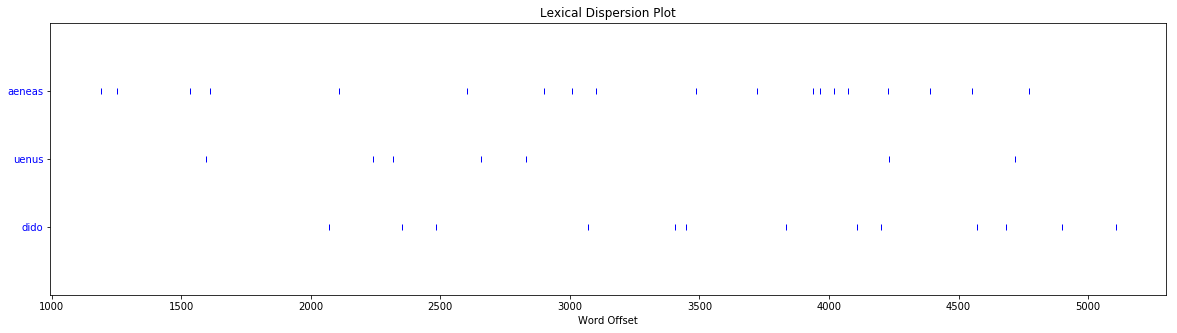

In [46]:
plt.figure(figsize=(20, 5))
virgil_Text.dispersion_plot(['aeneas', 'uenus', 'dido'])

### Graphed Frequency Distribution

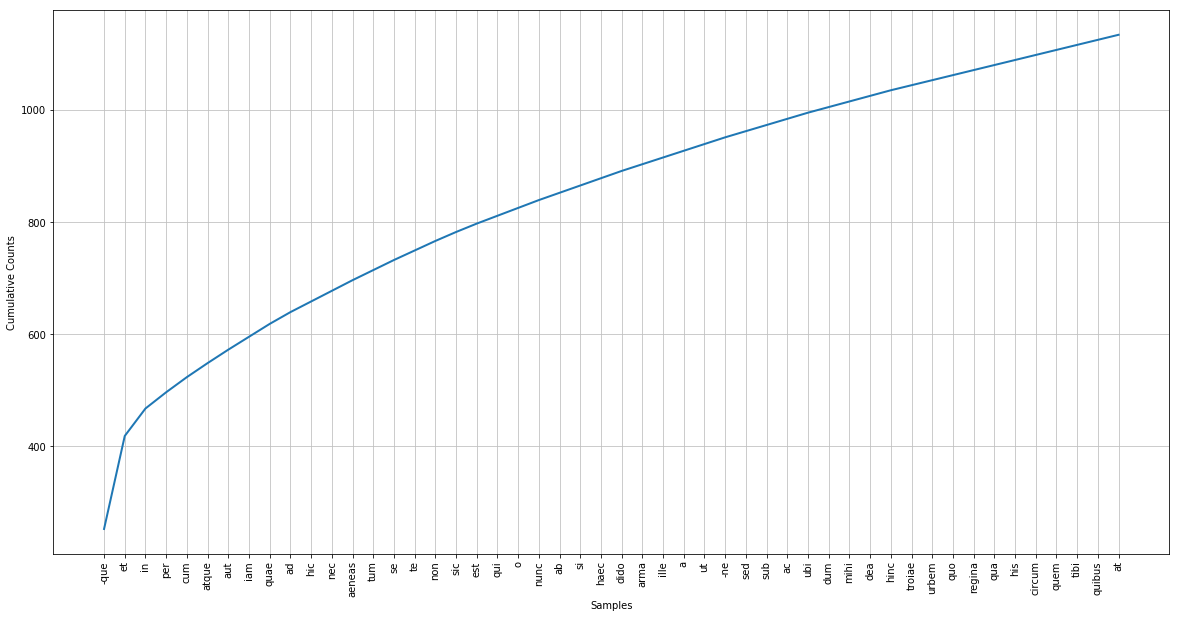

In [47]:
from nltk.probability import FreqDist

fdist = FreqDist(virgil_Text)

plt.figure(figsize=(20, 10))
fdist.plot(50, cumulative=True)

## Working with other CLTK Languages

### Working with Ancient Greek in CLTK

In [48]:
import re
import requests

response = requests.get('https://raw.githubusercontent.com/tesserae/tesserae/master/texts/grc/homer.iliad/homer.iliad.part.1.tess')
iliad = response.text

In [49]:
print(iliad[:100])

<hom. il. 1.1>	μῆνιν ἄειδε θεὰ Πηληϊάδεω ̓Αχιλῆος
<hom. il. 1.2>	οὐλομένην, ἣ μυρί' ̓Αχα


In [50]:
iliad = re.sub(r'<.+?>\t', '', iliad)
print(iliad[:100])

μῆνιν ἄειδε θεὰ Πηληϊάδεω ̓Αχιλῆος
οὐλομένην, ἣ μυρί' ̓Αχαιοῖς ἄλγε' ἔθηκε,
πολλὰς


In [51]:
import unicodedata

iliad = unicodedata.normalize('NFC', iliad)

In [52]:
from cltk.tokenize.word import WordTokenizer

word_tokenizer = WordTokenizer('greek')
tokens = word_tokenizer.tokenize(iliad)
print(tokens[:100])

['μῆνιν', 'ἄειδε', 'θεὰ', 'Πηληϊάδεω', '̓Αχιλῆος', 'οὐλομένην', ',', 'ἣ', 'μυρί', "'", '̓Αχαιοῖς', 'ἄλγε', "'", 'ἔθηκε', ',', 'πολλὰς', 'δ', "'", 'ἰφθίμους', 'ψυχὰς', '̓́Αϊδι', 'προί̈αψεν', 'ἡρώων', ',', 'αὐτοὺς', 'δὲ', 'ἑλώρια', 'τεῦχε', 'κύνεσσιν', 'οἰωνοῖσί', 'τε', 'πᾶσι', ',', 'Διὸς', 'δ', "'", 'ἐτελείετο', 'βουλή', ',', 'ἐξ', 'οὗ', 'δὴ', 'τὰ', 'πρῶτα', 'διαστήτην', 'ἐρίσαντε', '̓Ατρεί̈δης', 'τε', 'ἄναξ', 'ἀνδρῶν', 'καὶ', 'δῖος', '̓Αχιλλεύς', '.', 'τίς', 'τ', "'", 'ἄρ', 'σφωε', 'θεῶν', 'ἔριδι', 'ξυνέηκε', 'μάχεσθαι', ';', 'Λητοῦς', 'καὶ', 'Διὸς', 'υἱός', ':', 'ὃ', 'γὰρ', 'βασιλῆϊ', 'χολωθεὶς', 'νοῦσον', 'ἀνὰ', 'στρατὸν', 'ὄρσε', 'κακήν', ',', 'ὀλέκοντο', 'δὲ', 'λαοί', ',', 'οὕνεκα', 'τὸν', 'Χρύσην', 'ἠτίμασεν', 'ἀρητῆρα', '̓Ατρεί̈δης', ':', 'ὃ', 'γὰρ', 'ἦλθε', 'θοὰς', 'ἐπὶ', 'νῆας', '̓Αχαιῶν', 'λυσόμενός', 'τε', 'θύγατρα']


In [53]:
from cltk.tokenize.line import LineTokenizer

line_tokenizer = LineTokenizer('greek')
lines = line_tokenizer.tokenize(iliad)

In [54]:
from cltk.tag.pos import POSTag
tagger = POSTag('greek')

tagger.tag_ngram_123_backoff(lines[0])

[('μῆνιν', 'N-S---FA-'),
 ('ἄειδε', 'V2SPMA---'),
 ('θεὰ', 'N-S---FV-'),
 ('Πηληϊάδεω', None),
 ('̓', None),
 ('Αχιλῆος', None)]

### Working with Akkadian in CLTK

In [55]:
# In[1]: import os

from cltk.tokenize.word import WordTokenizer

word_tokenizer = WordTokenizer('akkadian')

In [56]:
line = 'u2-wa-a-ru at-ta e2-kal2-la-ka _e2_-ka wu-e-er'
tokens = word_tokenizer.tokenize(line)
pprint(tokens)

[('u2-wa-a-ru', 'akkadian'),
 ('at-ta', 'akkadian'),
 ('e2-kal2-la-ka', 'akkadian'),
 ('_e2_-ka', 'sumerian'),
 ('wu-e-er', 'akkadian')]


In [57]:
from cltk.stem.akkadian.syllabifier import Syllabifier

word = "epištašu"
syll = Syllabifier()
syll.syllabify(word)

['e', 'piš', 'ta', 'šu']

In [58]:
from cltk.stem.akkadian.declension import NaiveDecliner

word = 'ilum'
decliner = NaiveDecliner()
decliner.decline_noun(word, 'm')

[('ilum', {'case': 'nominative', 'number': 'singular'}),
 ('ilam', {'case': 'accusative', 'number': 'singular'}),
 ('ilim', {'case': 'genitive', 'number': 'singular'}),
 ('ilān', {'case': 'nominative', 'number': 'dual'}),
 ('ilīn', {'case': 'oblique', 'number': 'dual'}),
 ('ilū', {'case': 'nominative', 'number': 'plural'}),
 ('ilī', {'case': 'oblique', 'number': 'plural'})]